In [187]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
plt.style.use('classic')
%matplotlib inline

In [188]:
dir_name = 'mem-output/'
suffix = '-pages.log'

In [189]:
# percentage : overlapping / initialized
apps = ['geo', 'md2html', 'sentiment', 'ocr-img', 'img-resize', 'xc']
pcent=[]

for app in apps:
    with open(dir_name + app + suffix) as infile:
        lines = infile.readlines()
        if len(lines) == 9:
            denom, _, num = [int(x) for x in lines[7].strip().split(',')]
            pcent.append(100-num/denom*100)
        else:
            denom, _, num = [int(x) for x in lines[4].strip().split(',')]
            pcent.append(100-num/denom*100)

In [190]:
cgray = '#7A8B99'

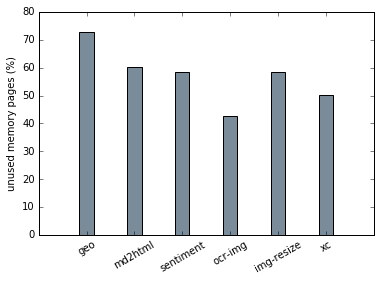

In [191]:
ind = np.arange(len(apps))
fig, ax = plt.subplots()
ax.bar(ind, pcent, width, color=cgray)
ax.set_xticks(ind)
ax.set_xticklabels(apps, rotation=30)
ax.set_ylabel('unused memory pages (%)')
plt.savefig('unused_mem.eps', format='eps')

In [192]:
#raw numbers by stage
kernel = []
init = []
runtime = []
total = []
apps = ['sentiment', 'ocr-img', 'xc']
for app in apps:
    with open(dir_name + app + suffix) as infile:
        lines = infile.readlines()
        data = [int(x) for x in lines[0].strip().split(',')]
        kernel.append(data[2])
        data = [int(x) for x in lines[1].strip().split(',')]
        init.append(data[2])
        data = [int(x) for x in lines[2].strip().split(',')]
        runtime.append(data[2])
        if len(lines) == 9:
            data = [int(x) for x in lines[7].strip().split(',')]
            total.append(data[0])
        else:
            data = [int(x) for x in lines[4].strip().split(',')]
            total.append(data[0])

In [193]:
width=0.3
ind = np.arange(len(apps))
kernel = np.array(kernel)
init = np.array(init)
runtime[-1] = 0
runtime = np.array(runtime)
total = np.array(total)
print(kernel)
print(init)
print(runtime)
print(total)

[7621 7571 7619]
[1167 1130 1018]
[1501 4105    0]
[ 8083 10947  7832]


In [194]:
cpurple = '#625772'
cred = '#f38181'
cbrown = '#BEB7A4'
cwhite = '#fefaec'
ccyan = '#a9eee6'

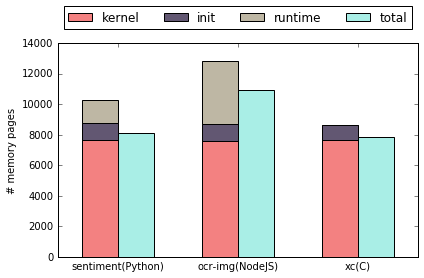

In [195]:
fig, ax1 = plt.subplots()
ax1.bar(ind-width/2, kernel, width, color=cred, label='kernel')
ax1.bar(ind-width/2, init, width, bottom=kernel, color=cpurple, label='init')
ax1.bar(ind-width/2, runtime, width, bottom=kernel+init, color=cbrown, label='runtime')
ax1.bar(ind+width/2, total, width, color=ccyan, label='total')

ax1.set_ylabel('# memory pages')
ax1.set_xticks(ind)
xlabels = [apps[0]+'(Python)', apps[1]+'(NodeJS)', apps[2]+'(C)']
ax1.set_xticklabels(xlabels)
ax1.legend(ncol=4, bbox_to_anchor=(1, 1.2))
fig.tight_layout()
plt.savefig('redundancy-page.eps', format='eps')

[29.76953125 29.57421875 29.76171875]
[4.55859375 4.4140625  3.9765625 ]
[ 5.86328125 16.03515625  0.        ]


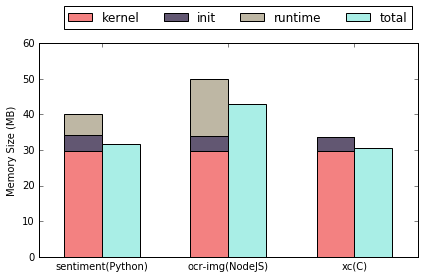

In [196]:
fig, ax1 = plt.subplots()
kernel_mb = kernel*4096/1048576
init_mb = init*4096/1048576
runtime_mb = runtime*4096/1048576
total_mb = total*4096/1048576

print(kernel_mb)
print(init_mb)
print(runtime_mb)

ax1.bar(ind-width/2, kernel_mb, width, color=cred, label='kernel')
ax1.bar(ind-width/2, init_mb, width, bottom=kernel_mb, color=cpurple, label='init')
ax1.bar(ind-width/2, runtime_mb, width, bottom=kernel_mb+init_mb, color=cbrown, label='runtime')
ax1.bar(ind+width/2, total_mb, width, color=ccyan, label='total')

ax1.set_ylabel('Memory Size (MB)')
ax1.set_xticks(ind)
xlabels = [apps[0]+'(Python)', apps[1]+'(NodeJS)', apps[2]+'(C)']
ax1.set_xticklabels(xlabels)
ax1.legend(ncol=4, bbox_to_anchor=(1, 1.2))
fig.tight_layout()
plt.savefig('redundancy-mb.eps', format='eps')

In [201]:
apps = ['geo', 'md2html', 'sentiment', 'ocr-img', 'img-resize', 'xc']
data=[]
for app in apps:
    with open(dir_name + app + suffix) as infile:
        lines = infile.readlines()
        data.append([int(x)*4096/1048576 for x in lines[4].strip().split(',')][0])
print(data)

[36.375, 48.59765625, 66.28125, 126.625, 116.0078125, 30.59375]


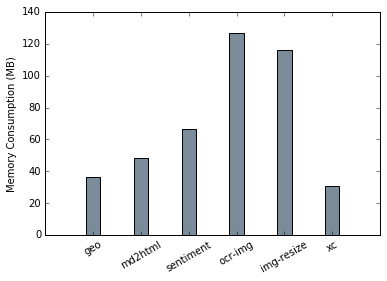

In [202]:
ind = np.arange(len(apps))
fig, ax = plt.subplots()
ax.bar(ind, data, width, color=cgray)
ax.set_xticks(ind)
ax.set_xticklabels(apps, rotation=30)
ax.set_ylabel('Memory Consumption (MB)')
plt.savefig('mem_consumption.eps', format='eps')